In [1]:
import math
from mpmath import mp, fp
from functools import partial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ctypes
import random

In [24]:
def get_unary_cmath(func_name):
    if (func_name == "id"): return lambda x: x
    
    if True:
        # use Python Function
        return getattr(math, func_name)
    else:
        # use libm
        libm = ctypes.cdll['libm.so.6']
        f = getattr(libm, func_name)
        f.argtypes = [ctypes.c_double]
        f.restype  = ctypes.c_double
        return f

def get_unary_mpmath(func_name):
    if (func_name == "id"): return lambda x: x

    return getattr(mp, func_name)

def compare_unary_funcs(func, c_func, mp_func, dom_min, dom_max, values = 1000, reci = False):
    random.seed(1)
    
    result = []
    for i in range(values):
        x = random.random() * (dom_max - dom_min) + dom_min
        c = c_func(x)
        m = mp_func(mp.convert(x))
        if reci:
            c = 1.0 / c
            m = mp.convert(1.0) / m
        
        result.append({'func': ("i" if reci else "") + func, 'x': x, 'c': c, 'm': m})
    
    return sorted(result, key=lambda x: x["x"])

def compare_unary_funcs(func, c_func, mp_func, dom_min, dom_max, values = 1000, reci = False):
    random.seed(1)
    
    result = []
    for i in range(values):
        x = random.random() * (dom_max - dom_min) + dom_min
        c = c_func(x)
        m = mp_func(mp.convert(x))
        if reci:
            c = 1.0 / c
            m = mp.convert(1.0) / m
        
        result.append({'func': ("i" if reci else "") + func, 'x': x, 'c': c, 'm': m})
    
    return sorted(result, key=lambda x: x["x"])


def compare_binary_funcs(func, c_func, mp_func, dom_min, dom_max, values = 1000):
    random.seed(1)
    
    result = []
    for i in range(values):
        x = random.random() * (dom_max - dom_min) + dom_min
        y = random.random() * (dom_max - dom_min) + dom_min
        c = c_func(x, y)
        m = mp_func(mp.convert(x), mp.convert(y))
        
        result.append({'func': func, 'x': x, 'y': y, 'xpy': x + y, 'c': c, 'm': m})
    
    return sorted(result, key=lambda x: x["x"])


def compare_unary_impls(func, dom_min, dom_max, values = 1000, reci = False):
    c_func  = get_unary_cmath(func)
    mp_func = get_unary_mpmath(func)
    return compare_unary_funcs(func, c_func, mp_func, dom_min, dom_max, values, reci)

R = 30
cR = math.cosh(R)
mp.dps = 100

results = []

results += compare_unary_impls("cos", 0.0, 2 * math.pi)
results += compare_unary_impls("sin", 0.0, 2 * math.pi)
results += compare_unary_impls("cosh", 0.0, R)
results += compare_unary_impls("sinh", 0.0, R)
results += compare_unary_impls("id", 0.0, cR, reci = True)
results += compare_unary_impls("sinh", 0.0, R, reci = True)
results += compare_unary_impls("acosh", 0.0, cR)

results += compare_binary_funcs("add", float.__add__,     mp.fadd, 0.0, cR)
results += compare_binary_funcs("sub", float.__sub__,     mp.fsub, 0.0, cR)
results += compare_binary_funcs("mul", float.__mul__,     mp.fmul, 0.0, cR)
results += compare_binary_funcs("div", lambda x,y: x / y, mp.fdiv, 0.0, cR)

results += compare_binary_funcs("cos2", lambda x, y: math.cos(x+y), lambda x, y: mp.cos(x+y), 0.0, math.pi)


data = pd.DataFrame(results)


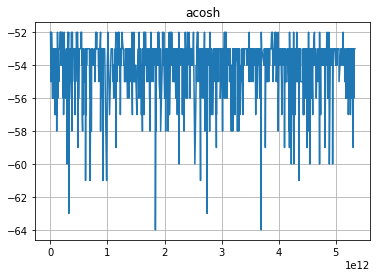

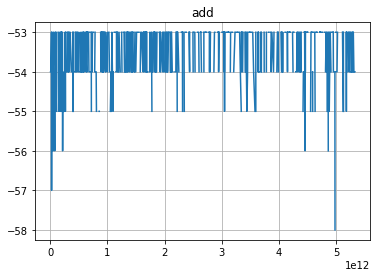

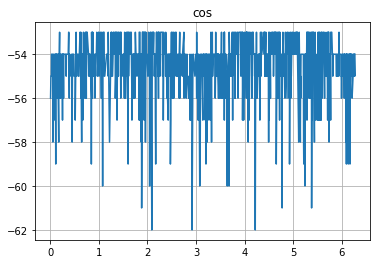

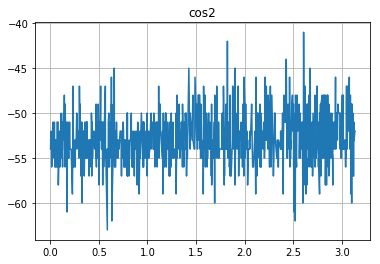

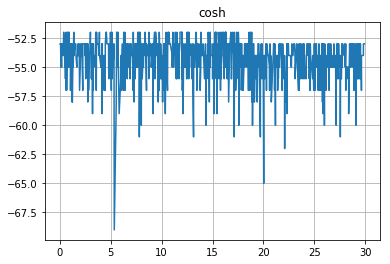

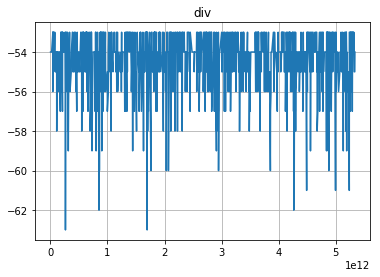

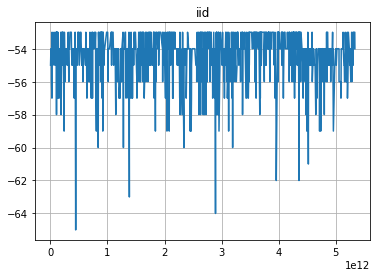

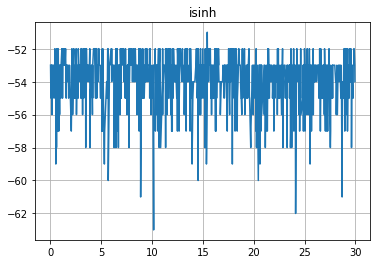

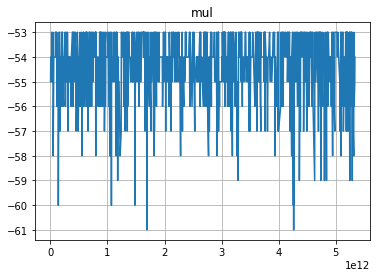

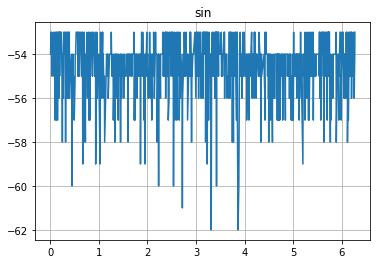

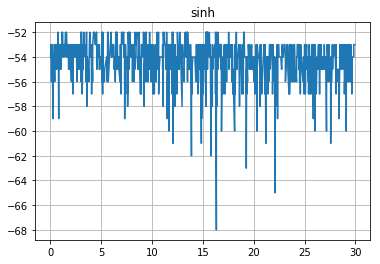

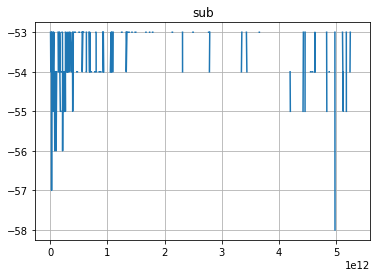

In [25]:
def bits_agreeing(correct, approx):
    res = mp.mag(correct) - mp.log(mp.fabs(correct - approx), 2)
    return float(res)

data["bits"] = data.apply(lambda x: mp.mag(mp.fabs(x.m - x.c) / x.m), axis=1)
data["rerr"] = data.apply(lambda x: float(mp.fabs(x.m - x.c) / x.m), axis=1)

col = "bits"
for func, view in data.groupby("func"):
    plt.title(func)
    plt.plot(view.x, view[col])
    plt.grid()
    #plt.ylim(-60, -51)
    plt.show()
    

In [ ]:
float(mp.convert("1.2"))